In [2]:
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi
import matplotlib.pyplot as mpl

In [1]:
#Tetrominos Dataset
straight = [[1, 1, 1], 
            [0, 0, 0], 
            [0, 0, 0]]
square = [[1, 1, 0], 
          [1, 1, 0], 
          [0, 0, 0]]
t = [[1, 1, 1], 
     [0, 1, 0], 
     [0, 0, 0]]
l = [[1, 0, 0], 
     [1, 0, 0], 
     [1, 1, 0]]
skew = [[0, 1, 1], 
        [1, 1, 0], 
        [0, 0, 0]]

#2x2 Dataset
#left line
ll = [[1, 0], [1, 0]]
#right line
rl = [[0, 1], [0, 1]]
#top line
tl = [[1, 1], [0, 0]]
#bottom line
bl = [[0, 0], [1, 1]]
#top left pixel
tlp = [[1, 0], [0, 0]]
#bottom right pixel
brp = [[0, 0], [0, 1]]

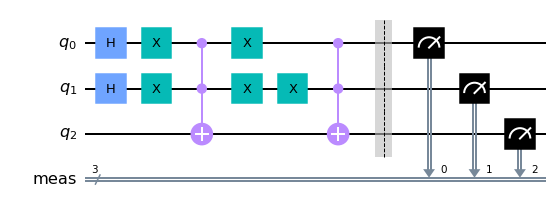

In [21]:
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)

qc.x(0)
#qc.x(1)
#qc.ccx(0, 1, 2)
#qc.x(0)
#qc.x(1)

qc.x(1)
qc.ccx(0, 1, 2)

qc.x(1)
qc.x(0)
#qc.ccx(0, 1, 2)

qc.x(1)
qc.ccx(0, 1, 2)


qc.measure_all()

qc.draw('mpl')

{'000': 1043, '001': 993, '110': 1033, '111': 1027}


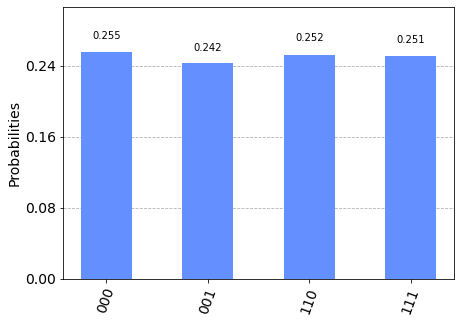

In [22]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc, shots=4096)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

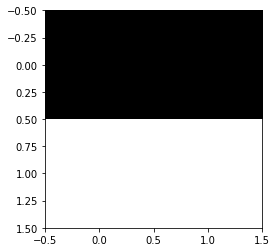

In [23]:
image=[[0, 0], [0, 0]]
values=[[0, 0], [0, 0]]
for x in counts:
    if x[1:] == '00':
        if counts[x] > values[0][0]:
            values[0][0]=counts[x]
            image[0][0]=int(x[0])
    elif x[1:] == '01':
        if counts[x] > values[0][1]:
            values[0][1]=counts[x]
            image[0][1]=int(x[0])
    elif x[1:] == '10':
        if counts[x] > values[1][0]:
            values[1][0]=counts[x]
            image[1][0]=int(x[0])
    elif x[1:] == '11':
        if counts[x] > values[1][1]:
            values[1][1]=counts[x]
            image[1][1]=int(x[0])
mpl.imshow(image, cmap="gray")